In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [2]:
# Suppress specific future warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")
warnings.filterwarnings("ignore", category=FutureWarning, module="SMOTE")

In [3]:
# Load data
data = pd.read_csv('source/data.csv')

In [4]:
# Ensure that each column in the DataFrame is in the desired format

# Columns that should be of type object (string)
object_columns = ['AccID', 'vehicleID', 'num_veh']

# Columns that should be of type int64
int_columns = [
    'day', 'month', 'year', 'time', 'lum', 'atm_condition', 'collision_type',
    'route_category', 'traffic_regime', 'total_number_lanes', 'reserved_lane_code',
    'longitudinal_profile', 'plan', 'surface_condition', 'infra',
    'accident_situation', 'maximum_speed', 'traffic_direction', 'vehicle_category',
    'fixed_obstacle', 'mobile_obstacle', 'initial_impact_point', 'manv',
    'motor', 'seat', 'user_category', 'gravity', 'gender', 'birth_year',
    'reason_travel', 'safety_equipment1', 'age'
]

# Columns that should be of type float64
float_columns = [
    'lat', 'long', 'upstream_terminal_number', 'distance_upstream_terminal'
]

# Convert columns to the correct data types
data[object_columns] = data[object_columns].astype(str)
data[int_columns] = data[int_columns].astype(np.int64)
data[float_columns] = data[float_columns].astype(float)

# Check the data types to confirm the changes
data.dtypes


AccID                          object
day                             int64
month                           int64
year                            int64
time                            int64
lum                             int64
atm_condition                   int64
collision_type                  int64
lat                           float64
long                          float64
route_category                  int64
traffic_regime                  int64
total_number_lanes              int64
reserved_lane_code              int64
longitudinal_profile            int64
upstream_terminal_number      float64
distance_upstream_terminal    float64
plan                            int64
surface_condition               int64
infra                           int64
accident_situation              int64
maximum_speed                   int64
vehicleID                      object
num_veh                        object
traffic_direction               int64
vehicle_category                int64
fixed_obstac

In [5]:
# Selecting the columns to scale
features_to_scale = ['age', 'maximum_speed', 'distance_upstream_terminal', 'total_number_lanes', 'lat', 'long']

# Initialize the scaler 
scaler = StandardScaler()  

# Fit and transform the selected features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Display the first few rows of the scaled features to confirm
data[features_to_scale].head()

age  maximum_speed  distance_upstream_terminal  total_number_lanes  \
0 -1.141512       0.509356                    1.946753            5.385555   
1 -0.663829       0.509356                    1.946753            5.385555   
2  1.140752       0.509356                    1.946753            5.385555   
3 -0.716905       0.509356                    1.782943           -0.340441   
4 -0.823057       1.494600                    0.755404            3.954056   

        lat      long  
0  0.805698 -0.063104  
1  0.805698 -0.063104  
2  0.805698 -0.063104  
3  0.821290 -0.104276  
4  0.823628 -0.124441

gravity
1    187686
4    180882
3     67825
2     11277
Name: count, dtype: int64


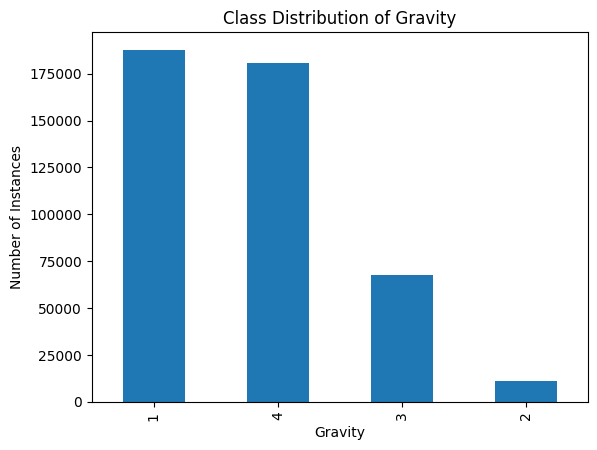

In [6]:
# Analyze the distribution of the gravity classes
class_distribution = data['gravity'].value_counts()
print(class_distribution)

# Plot the distribution for better visualization
class_distribution.plot(kind='bar')
plt.title('Class Distribution of Gravity')
plt.xlabel('Gravity')
plt.ylabel('Number of Instances')
plt.show()

In [7]:
# Define your features (X) and target (y)
data = data.drop(columns=object_columns)
X = data.drop(columns=['gravity'])
y = data['gravity']

In [8]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

C:\Users\sd10725\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\sd10725\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [9]:
# Apply Random Oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

In [10]:
# Apply Random Undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [11]:
# Split the original data, SMOTE data, oversampled data, and undersampled data into training and testing sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)

In [12]:
# Train and evaluate a Random Forest model with class weighting
clf_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_weighted.fit(X_train_orig, y_train_orig)
y_pred_weighted = clf_weighted.predict(X_test_orig)
weighted_report = classification_report(y_test_orig, y_pred_weighted)

In [13]:
# Train and evaluate a Random Forest model on SMOTE data
clf_smote = RandomForestClassifier(random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = clf_smote.predict(X_test_smote)
smote_report = classification_report(y_test_smote, y_pred_smote)

In [14]:
# Train and evaluate a Random Forest model on oversampled data
clf_over = RandomForestClassifier(random_state=42)
clf_over.fit(X_train_over, y_train_over)
y_pred_over = clf_over.predict(X_test_over)
oversample_report = classification_report(y_test_over, y_pred_over)

In [15]:
# Train and evaluate a Random Forest model on undersampled data
clf_under = RandomForestClassifier(random_state=42)
clf_under.fit(X_train_under, y_train_under)
y_pred_under = clf_under.predict(X_test_under)
undersample_report = classification_report(y_test_under, y_pred_under)

In [16]:
print('Original + Class Weighting:', weighted_report)
print('SMOTE:', smote_report)
print('Oversampling:', oversample_report)
print('Undersampling:', undersample_report)

Original + Class Weighting:               precision    recall  f1-score   support

           1       0.73      0.85      0.78     37371
           2       0.43      0.05      0.09      2335
           3       0.54      0.39      0.45     13737
           4       0.66      0.66      0.66     36091

    accuracy                           0.68     89534
   macro avg       0.59      0.49      0.50     89534
weighted avg       0.67      0.68      0.67     89534

SMOTE:               precision    recall  f1-score   support

           1       0.73      0.82      0.77     37195
           2       0.87      0.93      0.90     37873
           3       0.76      0.70      0.73     37542
           4       0.69      0.61      0.65     37539

    accuracy                           0.77    150149
   macro avg       0.76      0.77      0.76    150149
weighted avg       0.76      0.77      0.76    150149

Oversampling:               precision    recall  f1-score   support

           1       0.76   

Let's break down the results for each method:

### **1. Original + Class Weighting:**
- **Precision, Recall, F1-Score:**
  - **Class 1:** High precision (0.73) and recall (0.85), indicating the model is good at correctly identifying and classifying instances of this class.
  - **Class 2:** Very low precision (0.43) and recall (0.05), showing that the model struggles significantly with this minority class.
  - **Class 3:** Moderate precision (0.54) and recall (0.39), but not performing as well as Class 1.
  - **Class 4:** Balanced precision and recall around 0.66, indicating a decent but not outstanding performance.
- **Overall Performance:**
  - **Accuracy:** 0.68, meaning 68% of the instances were correctly classified.
  - **Macro Average:** Reflects the average performance across all classes, showing lower values due to poor performance on Class 2.
  - **Weighted Average:** Weighted by support (number of instances), shows a similar pattern to overall accuracy.

**Interpretation:**
- **Strengths:** The model performs reasonably well on the more frequent classes (1 and 4).
- **Weaknesses:** Class 2 is severely underrepresented, leading to poor performance despite the class weighting. The model struggles with minority classes, indicating that class weighting alone might not be sufficient to address imbalance.

### **2. SMOTE (Synthetic Minority Over-sampling Technique):**
- **Precision, Recall, F1-Score:**
  - **Class 1:** High precision and recall (around 0.73 and 0.82), similar to the original model but slightly better.
  - **Class 2:** Very high precision (0.87) and recall (0.93), a significant improvement due to synthetic data generation.
  - **Class 3:** Good performance with precision at 0.76 and recall at 0.70.
  - **Class 4:** Lower recall (0.61) compared to precision (0.69), indicating some difficulty in identifying this class.
- **Overall Performance:**
  - **Accuracy:** 0.77, better than the original model.
  - **Macro Average:** Reflects a balanced performance across classes, indicating that SMOTE helped mitigate class imbalance.
  - **Weighted Average:** Consistent with macro averages, suggesting overall balanced model performance.

**Interpretation:**
- **Strengths:** SMOTE significantly improves the model's ability to classify the minority class (Class 2) without sacrificing much performance on other classes.
- **Weaknesses:** While overall performance improves, Class 4 still shows lower recall, indicating some misclassifications.

### **3. Oversampling:**
- **Precision, Recall, F1-Score:**
  - **Class 1:** Precision and recall are high (0.76 and 0.83).
  - **Class 2:** Near-perfect performance (0.99 precision and 1.00 recall), indicating that the model almost perfectly classifies this class after oversampling.
  - **Class 3:** High precision and recall (0.85 and 0.95).
  - **Class 4:** Good precision (0.79) but lower recall (0.62), similar to the SMOTE results.
- **Overall Performance:**
  - **Accuracy:** 0.85, significantly higher than the original model.
  - **Macro Average:** High across all metrics, showing that oversampling has led to well-rounded performance.
  - **Weighted Average:** Consistently high, indicating that oversampling benefits the majority and minority classes alike.

**Interpretation:**
- **Strengths:** Oversampling leads to strong performance across all classes, especially Class 2, which had issues in the original model.
- **Weaknesses:** Class 4 shows relatively lower recall, similar to the SMOTE model, but overall the model performs well.

### **4. Undersampling:**
- **Precision, Recall, F1-Score:**
  - **Class 1:** Moderate precision (0.66) and recall (0.78), showing decent performance.
  - **Class 2:** Balanced but moderate performance (precision 0.57, recall 0.66).
  - **Class 3:** Lower performance with precision and recall around 0.46 and 0.39.
  - **Class 4:** Similar moderate performance (precision 0.56, recall 0.46).
- **Overall Performance:**
  - **Accuracy:** 0.57, significantly lower than other methods due to the reduced dataset size.
  - **Macro Average:** Shows balanced but overall lower performance due to fewer data points.
  - **Weighted Average:** Consistent with overall accuracy, indicating a modest model performance.

**Interpretation:**
- **Strengths:** Undersampling provides a balanced approach across all classes, avoiding bias towards any class.
- **Weaknesses:** Overall lower performance due to the loss of data from the majority class, making it less effective compared to SMOTE or oversampling.

### **Overall Comparison:**

- **SMOTE and Oversampling:** Both significantly improve model performance, especially for the minority class (Class 2). Oversampling leads to the highest accuracy and balanced performance across all classes.
- **Class Weighting:** Provides some improvement, but struggles with the minority class (Class 2), making it less effective.
- **Undersampling:** While it balances class distribution, it results in a loss of overall accuracy due to the reduction in data.

### **Conclusion:**
If the goal is to achieve the best possible accuracy and balanced performance across all classes, **oversampling** appears to be the most effective technique. However, if computational efficiency and avoiding data duplication are concerns, **SMOTE** also offers a significant improvement. **Class weighting** is a simpler approach but less effective in handling severe class imbalance, and **undersampling** may not be ideal due to the significant reduction in data and overall accuracy.

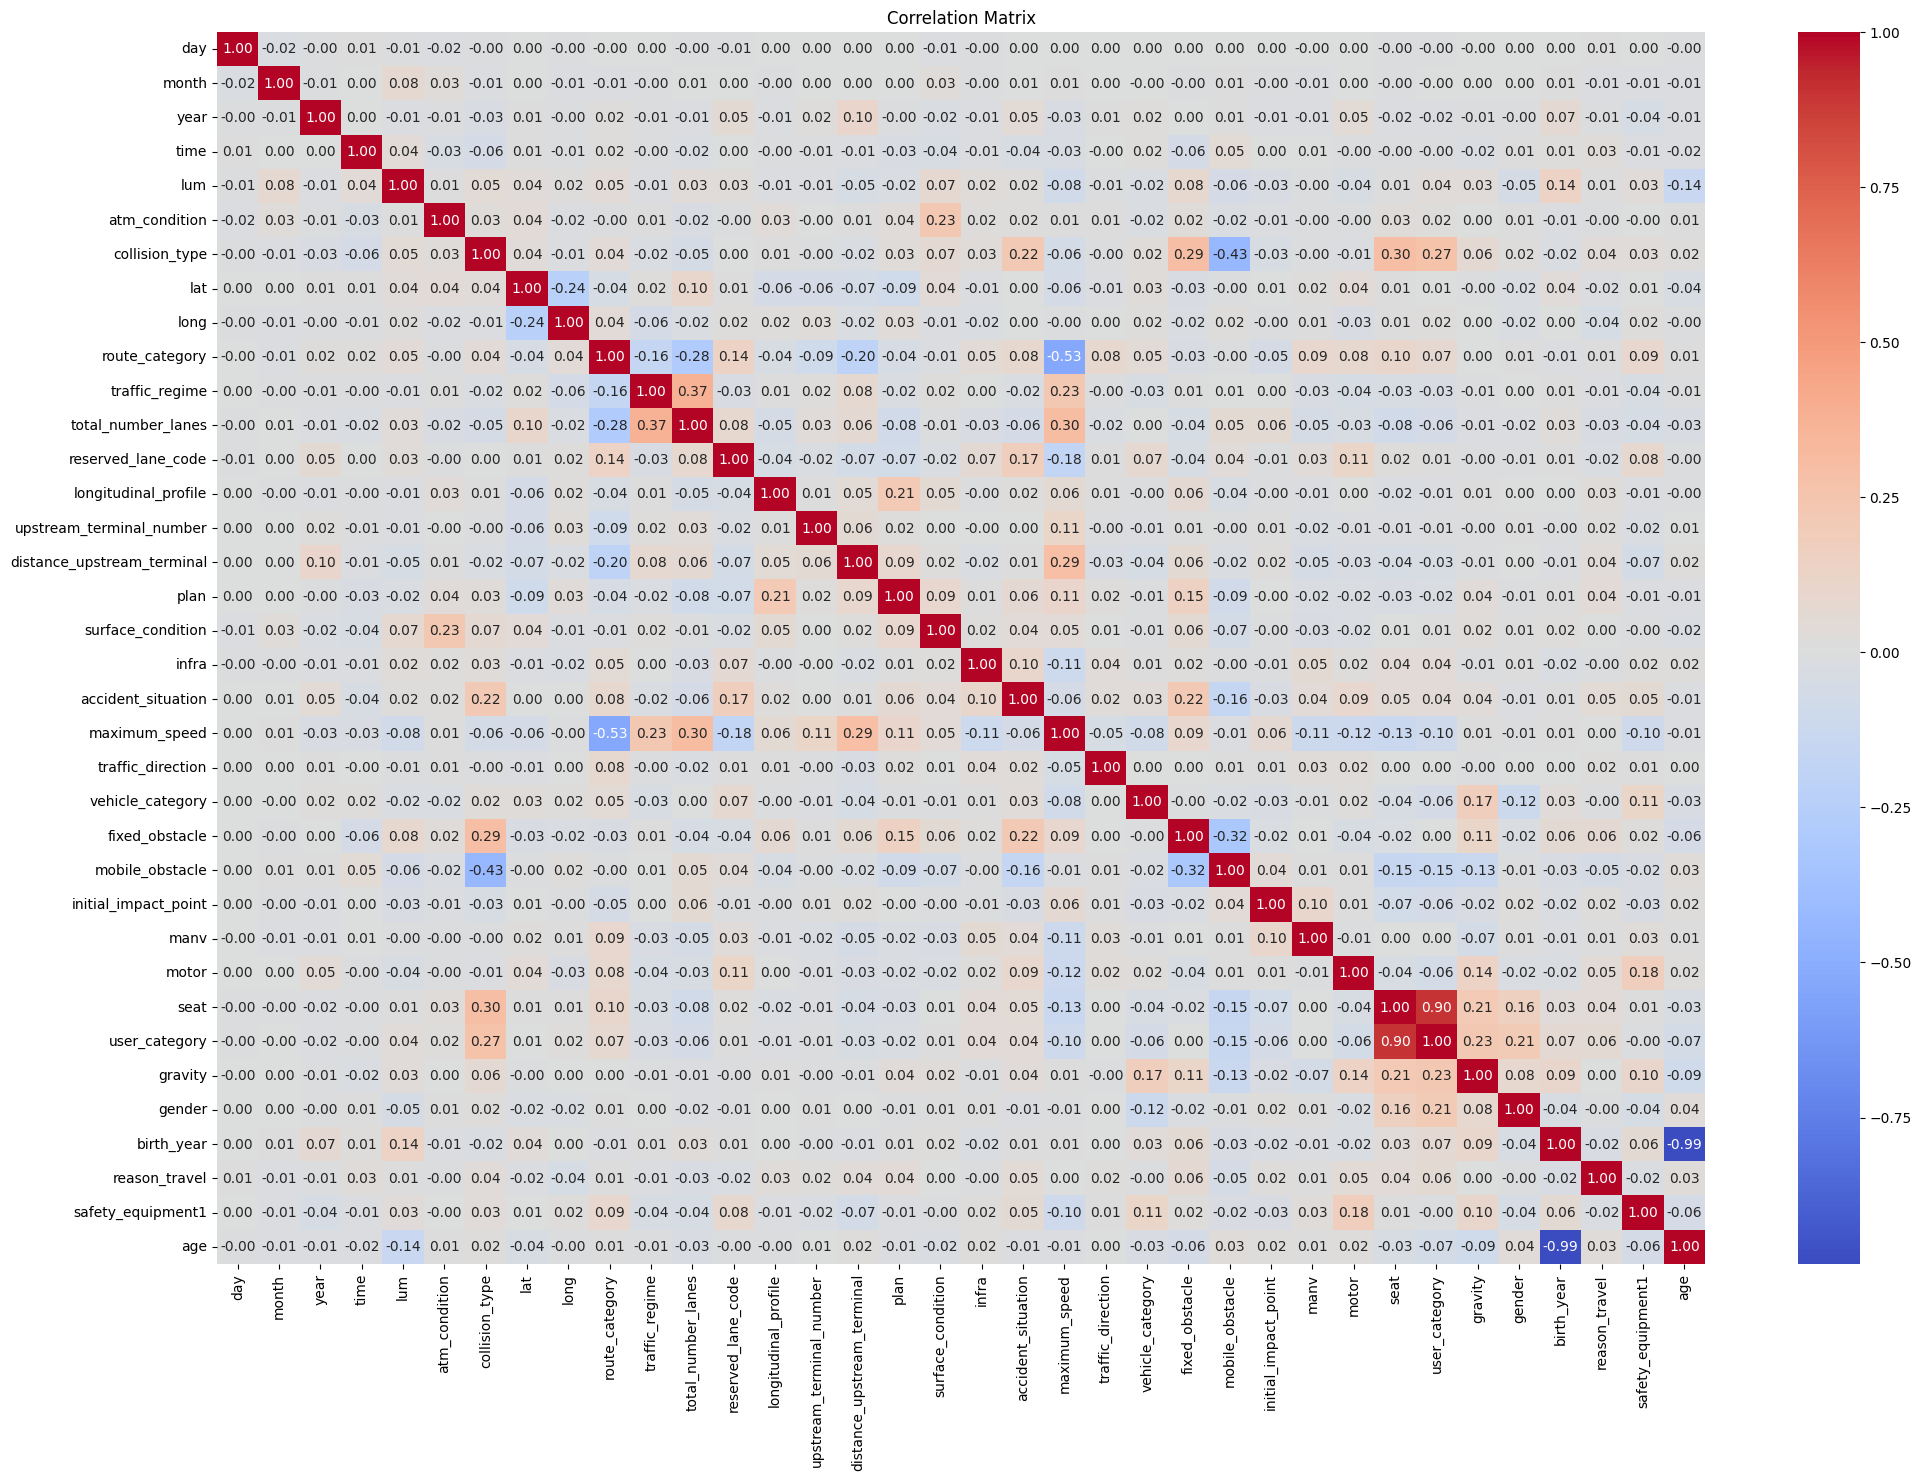

gravity                       1.000000
user_category                 0.225488
seat                          0.213830
vehicle_category              0.174109
motor                         0.137000
mobile_obstacle               0.126286
fixed_obstacle                0.108893
safety_equipment1             0.095200
age                           0.092519
birth_year                    0.092458
gender                        0.078776
manv                          0.068836
collision_type                0.063093
plan                          0.036741
accident_situation            0.035035
lum                           0.030922
initial_impact_point          0.024736
surface_condition             0.023044
time                          0.018462
longitudinal_profile          0.013631
total_number_lanes            0.009759
infra                         0.007659
year                          0.007577
maximum_speed                 0.007149
distance_upstream_terminal    0.007015
traffic_regime           

In [17]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Select features based on correlation with the target variable (gravity)
correlation_with_target = corr_matrix['gravity'].abs().sort_values(ascending=False)
print(correlation_with_target)


Implications for Feature Selection:
High and Moderate Correlation Features: we might want to prioritize features like user_category, seat, vehicle_category, motor, mobile_obstacle, and fixed_obstacle in the predictive model, as they have a stronger relationship with the target variable.
Low Correlation Features: Features like lat, long, day, and month might be considered for removal or given less importance unless they play a role in non-linear relationships or in combination with other features.

In [18]:
threshold = 0.01 
# Define features (X) and target (y)
X = data.drop(columns=['gravity'])
y = data['gravity']

# Compute mutual information
mi_scores = mutual_info_classif(X, y)

# Create a series with feature names and their MI scores
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi_series)

# Select top features based on mutual information
selected_features_mi = mi_series[mi_series > threshold].index.tolist()  # Set a threshold as needed


safety_equipment1             0.125011
vehicle_category              0.111464
user_category                 0.055844
mobile_obstacle               0.051209
seat                          0.050443
collision_type                0.043684
manv                          0.042487
accident_situation            0.041186
route_category                0.033935
maximum_speed                 0.033435
motor                         0.032791
fixed_obstacle                0.032389
reason_travel                 0.029129
traffic_regime                0.028341
gender                        0.028315
initial_impact_point          0.028093
plan                          0.025995
surface_condition             0.024713
distance_upstream_terminal    0.022062
total_number_lanes            0.020173
age                           0.020129
longitudinal_profile          0.019296
birth_year                    0.019185
lum                           0.018072
atm_condition                 0.017748
traffic_direction        

Implications for Feature Selection:
High MI Scores: Features like safety_equipment1, vehicle_category, user_category, and seat should be prioritized in your model as they provide the most information about the target variable (gravity). These features have a strong relationship with accident severity and should be included in the model.

Moderate MI Scores: Features like mobile_obstacle, collision_type, and accident_situation are also important and should be considered for inclusion, but they may not be as critical as the top features.

Low MI Scores: Features with very low mutual information scores, such as day, month, infra, and reserved_lane_code, might be candidates for exclusion from the model. These features contribute little to the prediction of gravity and removing them could simplify the model without sacrificing accuracy.

Conclusion:
The mutual information scores provide valuable insight into which features are most relevant for predicting accident severity. By focusing on the features with the highest scores, you can build a more efficient and effective model. Features with low scores can be considered for removal, helping to reduce model complexity and potential overfitting.

In [19]:
# Define features (X) and target (y)
X = data.drop(columns=['gravity'])
y = data['gravity']

# Train a Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

# Extract feature importances
importances = clf.feature_importances_

# Create a series with feature names and their importance scores
importance_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(importance_series)

# Select top features based on importance
selected_features_rf = importance_series[importance_series > threshold].index.tolist() 


lat                           0.064407
vehicle_category              0.061969
long                          0.061189
time                          0.054403
birth_year                    0.052420
age                           0.052322
safety_equipment1             0.050591
day                           0.043466
upstream_terminal_number      0.035999
distance_upstream_terminal    0.035846
month                         0.034871
collision_type                0.034245
mobile_obstacle               0.032527
seat                          0.032244
manv                          0.032232
initial_impact_point          0.028855
user_category                 0.024428
maximum_speed                 0.024111
fixed_obstacle                0.023873
reason_travel                 0.022216
year                          0.020420
route_category                0.018894
total_number_lanes            0.018390
traffic_direction             0.018218
motor                         0.017931
gender                   

Implications for Feature Selection:
High Importance Scores: Features such as lat, vehicle_category, long, and time should be prioritized in your predictive model. They have the strongest relationship with the target variable and are crucial for accurate predictions.

Moderate Importance Scores: Features like birth_year, age, safety_equipment1, and collision_type should also be considered for inclusion. While not as critical as the top features, they still provide meaningful information that can improve model accuracy.

Low Importance Scores: Features with very low importance scores, such as reserved_lane_code and surface_condition, might be candidates for exclusion. Removing these features could simplify the model and potentially improve its performance by reducing noise.

Conclusion:
The Random Forest model has identified a mix of geographic, temporal, demographic, and safety-related features as key predictors of accident severity. By focusing on the most important features, you can build a more efficient and effective model. Less important features may be excluded to streamline the model and avoid overfitting. This analysis provides a clear guide on which features to prioritize in your final model.

Summary of Differences:
Correlation Matrix: Focuses purely on linear relationships and might miss non-linear or interaction effects.
Mutual Information Scores: Captures both linear and non-linear dependencies, offering a broader view of feature relevance.
Random Forest Importance Scores: Reflects how features contribute to the model’s predictive power, accounting for non-linearities and interactions between features.
Why the Differences?
Linear vs. Non-linear Relationships: Correlation only captures linear relationships, while MI and Random Forest can capture more complex relationships.
Feature Interactions: Random Forest can naturally account for interactions between features, which the other methods do not directly measure.
Model-specific Metrics: Random Forest importance scores are derived from the model’s internal mechanics and are thus specific to how that model interprets the data.
Choosing the Right Method:
For Linear Data: Correlation might be sufficient if you expect features to have linear relationships with the target.
For Complex Relationships: Use MI scores or feature importance from models like Random Forests to capture more nuanced relationships.
Model Optimization: Use Random Forest feature importance when you need to know which features directly contribute to the model's performance.

In [21]:
import pandas as pd

# Correlation Matrix results
corr_matrix_results = {
    "user_category": 0.225488,
    "seat": 0.213830,
    "vehicle_category": 0.174109,
    "motor": 0.137000,
    "mobile_obstacle": 0.126286,
    "fixed_obstacle": 0.108893,
    "safety_equipment1": 0.095200,
    "age": 0.092519,
    "birth_year": 0.092458,
    "gender": 0.078776,
    "manv": 0.068836,
    "collision_type": 0.063093,
    "plan": 0.036741,
    "accident_situation": 0.035035,
    "lum": 0.030922,
    "initial_impact_point": 0.024736,
    "surface_condition": 0.023044,
    "time": 0.018462,
    "longitudinal_profile": 0.013631,
    "total_number_lanes": 0.009759,
    "infra": 0.007659,
    "year": 0.007577,
    "maximum_speed": 0.007149,
    "distance_upstream_terminal": 0.007015,
    "traffic_regime": 0.006906,
    "traffic_direction": 0.004691,
    "reason_travel": 0.004505,
    "long": 0.004044,
    "upstream_terminal_number": 0.003133,
    "route_category": 0.002846,
    "reserved_lane_code": 0.002399,
    "atm_condition": 0.001014,
    "lat": 0.000845,
    "month": 0.000522,
    "day": 0.000163
}

# Mutual Information Scores
mi_scores_results = {
    "safety_equipment1": 0.124543,
    "vehicle_category": 0.113814,
    "user_category": 0.055870,
    "seat": 0.050751,
    "mobile_obstacle": 0.050564,
    "collision_type": 0.043949,
    "manv": 0.043866,
    "accident_situation": 0.041700,
    "route_category": 0.035427,
    "fixed_obstacle": 0.034207,
    "motor": 0.033969,
    "maximum_speed": 0.030884,
    "gender": 0.030119,
    "initial_impact_point": 0.029013,
    "plan": 0.027890,
    "reason_travel": 0.027678,
    "traffic_regime": 0.027256,
    "surface_condition": 0.025275,
    "distance_upstream_terminal": 0.022018,
    "total_number_lanes": 0.019924,
    "lum": 0.019801,
    "atm_condition": 0.019758,
    "age": 0.019213,
    "longitudinal_profile": 0.019198,
    "birth_year": 0.018008,
    "long": 0.014357,
    "lat": 0.013222,
    "traffic_direction": 0.013068,
    "upstream_terminal_number": 0.011563,
    "year": 0.007547,
    "time": 0.005061,
    "month": 0.004336,
    "infra": 0.002353,
    "reserved_lane_code": 0.001648,
    "day": 0.001539
}

# Random Forest Importance Scores
rf_importance_scores = {
    "lat": 0.064407,
    "vehicle_category": 0.061969,
    "long": 0.061189,
    "time": 0.054403,
    "birth_year": 0.052420,
    "age": 0.052322,
    "safety_equipment1": 0.050591,
    "day": 0.043466,
    "upstream_terminal_number": 0.035999,
    "distance_upstream_terminal": 0.035846,
    "month": 0.034871,
    "collision_type": 0.034245,
    "mobile_obstacle": 0.032527,
    "seat": 0.032244,
    "manv": 0.032232,
    "initial_impact_point": 0.028855,
    "user_category": 0.024428,
    "maximum_speed": 0.024111,
    "fixed_obstacle": 0.023873,
    "reason_travel": 0.022216,
    "year": 0.020420,
    "route_category": 0.018894,
    "total_number_lanes": 0.018390,
    "traffic_direction": 0.018218,
    "motor": 0.017931,
    "gender": 0.013266,
    "lum": 0.012418,
    "traffic_regime": 0.011893,
    "atm_condition": 0.011511,
    "plan": 0.010689,
    "infra": 0.010323,
    "longitudinal_profile": 0.009997,
    "accident_situation": 0.009751,
    "surface_condition": 0.008054,
    "reserved_lane_code": 0.006031
}

# Combine into a DataFrame
df_results = pd.DataFrame({
    "Correlation Matrix": corr_matrix_results,
    "Mutual Information Scores": mi_scores_results,
    "Random Forest Importance Scores": rf_importance_scores
}).fillna(0)  # Fill missing values with 0

# Display the DataFrame
df_results.head()


Correlation Matrix  Mutual Information Scores  \
user_category               0.225488                   0.055870   
seat                        0.213830                   0.050751   
vehicle_category            0.174109                   0.113814   
motor                       0.137000                   0.033969   
mobile_obstacle             0.126286                   0.050564   

                  Random Forest Importance Scores  
user_category                            0.024428  
seat                                     0.032244  
vehicle_category                         0.061969  
motor                                    0.017931  
mobile_obstacle                          0.032527

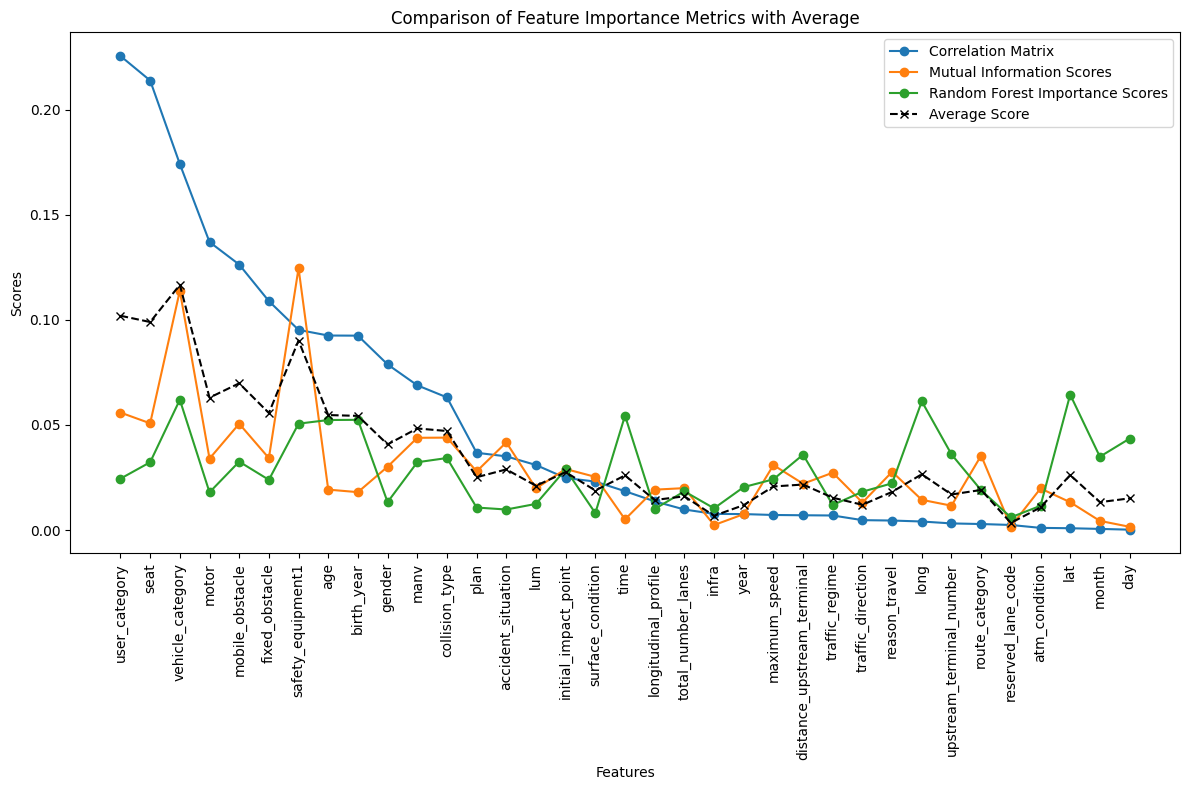

In [29]:
# Calculate the average of the three scores
df_results['Average Score'] = df_results.mean(axis=1)

# Plot the results
plt.figure(figsize=(12, 8))

# Plot Correlation Matrix Scores
plt.plot(df_results.index, df_results['Correlation Matrix'], label='Correlation Matrix', marker='o')

# Plot Mutual Information Scores
plt.plot(df_results.index, df_results['Mutual Information Scores'], label='Mutual Information Scores', marker='o')

# Plot Random Forest Importance Scores
plt.plot(df_results.index, df_results['Random Forest Importance Scores'], label='Random Forest Importance Scores', marker='o')

# Plot the Average Score
plt.plot(df_results.index, df_results['Average Score'], label='Average Score', marker='x', linestyle='--', color='black')

plt.title('Comparison of Feature Importance Metrics with Average')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

